In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from time import perf_counter
from tensorflow.keras.utils import load_img

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load Dataset

base_dir = '/content/drive/MyDrive/UTKFace'

In [ ]:
# labels age, gender, ethnicity

image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(base_dir)):
    image_path = os.path.join(base_dir, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/10497 [00:00<?, ?it/s]

In [ ]:
# convert to dataframe

df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/drive/MyDrive/UTKFace/67_0_1_20170117...,67,0
1,/content/drive/MyDrive/UTKFace/67_0_3_20161220...,67,0
2,/content/drive/MyDrive/UTKFace/67_1_0_20170120...,67,1
3,/content/drive/MyDrive/UTKFace/67_1_0_20170120...,67,1
4,/content/drive/MyDrive/UTKFace/67_1_0_20170110...,67,1


In [ ]:
print(len(df))
print(df.shape)

10497
(10497, 3)


In [ ]:
print("age_count: ",df['age'].value_counts())
print("gender count: ",df['gender'].value_counts())

age_count:  26     810
35     500
28     490
32     410
30     391
      ... 
101      2
116      2
91       2
103      1
111      1
Name: age, Length: 103, dtype: int64
gender count:  1    5268
0    5229
Name: gender, dtype: int64


In [ ]:
for column in df:
    print(f'{column} : {df[column].unique()}')

image : ['/content/drive/MyDrive/UTKFace/67_0_1_20170117185950062.jpg.chip.jpg'
 '/content/drive/MyDrive/UTKFace/67_0_3_20161220221736930.jpg.chip.jpg'
 '/content/drive/MyDrive/UTKFace/67_1_0_20170120223746014.jpg.chip.jpg'
 ...
 '/content/drive/MyDrive/UTKFace/18_0_3_20170117135605224.jpg.chip.jpg'
 '/content/drive/MyDrive/UTKFace/18_0_1_20170116210348146.jpg.chip.jpg'
 '/content/drive/MyDrive/UTKFace/18_1_0_20170105002457379.jpg.chip.jpg']
age : [ 67  68  69   6  70  71  72  73  74  75  76  78  79   7  80  81  82  83
  84  85  86  87  88  89   8  90  93  92  91  96  95   9  99   4  50  51
  52  53  54  55  56  57  58  59   5  60  61  62  63  64  65  66  40   3
  41  42  43  44  45  46  47  48  49  37  38  39  34  35  36  30  31  32
  33  28  29   2  26  27  24  25  18  19   1  20  21  22  23 100  10 101
 105 103  11 115 110 116 111  12  13  14  15  16  17]
gender : [0 1]


In [ ]:
# Age labels class assign

def class_labels_reassign(age_labels):

  if 1 <= age_labels <= 2:
    return 0
  elif 3 <= age_labels <= 5:
    return 1
  elif 6 <= age_labels <= 9:
    return 2
  elif 10 <= age_labels <= 20:
    return 3
  elif 21 <= age_labels <= 30:
    return 4
  elif 31 <= age_labels <= 40:
    return 5
  elif 41 <= age_labels <= 50:
    return 6
  elif 51 <= age_labels <= 60:
    return 7
  elif 61 <= age_labels <= 70:
    return 8
  elif 71 <= age_labels <= 80:
    return 9
  elif 81 <= age_labels <= 90:
    return 10
  elif 91 <= age_labels <= 100:
    return 11
  else:
    return 12

In [ ]:
df['age_target'] = df['age'].map(class_labels_reassign)
df.head()

,image,age,gender,age_target
0,/content/drive/MyDrive/UTKFace/67_0_1_20170117...,67,0,8
1,/content/drive/MyDrive/UTKFace/67_0_3_20161220...,67,0,8
2,/content/drive/MyDrive/UTKFace/67_1_0_20170120...,67,1,8
3,/content/drive/MyDrive/UTKFace/67_1_0_20170120...,67,1,8
4,/content/drive/MyDrive/UTKFace/67_1_0_20170110...,67,1,8


height: 200
width: 200


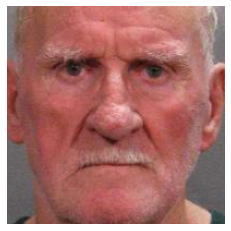

In [ ]:
# Exploratory Data Analysis

from PIL import Image
img = Image.open(df['image'][600])
plt.axis('off')
plt.imshow(img)

width, height = img.size
print("height:", height)
print("width:", width)

In [ ]:
sns.distplot(df['age'])

In [ ]:
sns.countplot(df['gender'])

In [ ]:
# Feature extraction

def extract_features(images):

    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
        #ignore this step if using RGB
    features = features.reshape(len(features), 1, 128, 128)
    return features

In [ ]:
X = extract_features(df['image'])

  0%|          | 0/10497 [00:00<?, ?it/s]

In [ ]:
X.shape

(10497, 1, 128, 128)

In [ ]:
X[0]

array([[[168, 165, 170, ...,   0,   4,   0],
        [174, 172, 173, ...,   0,   4,   5],
        [177, 174, 172, ...,   0,   2,   6],
        ...,
        [ 19,  18,  17, ..., 123, 134, 143],
        [ 21,  20,  18, ..., 138, 139, 142],
        [ 22,  21,  20, ..., 162, 152, 151]]], dtype=uint8)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X = X/255.0
X[0]

array([[[0.65882353, 0.64705882, 0.66666667, ..., 0.        ,
         0.01568627, 0.        ],
        [0.68235294, 0.6745098 , 0.67843137, ..., 0.        ,
         0.01568627, 0.01960784],
        [0.69411765, 0.68235294, 0.6745098 , ..., 0.        ,
         0.00784314, 0.02352941],
        ...,
        [0.0745098 , 0.07058824, 0.06666667, ..., 0.48235294,
         0.5254902 , 0.56078431],
        [0.08235294, 0.07843137, 0.07058824, ..., 0.54117647,
         0.54509804, 0.55686275],
        [0.08627451, 0.08235294, 0.07843137, ..., 0.63529412,
         0.59607843, 0.59215686]]])

In [ ]:
# setting labels

label_age = np.array(df['age_target'])
label_gender = np.array(df['gender'])
image = df['image']
print(label_age)

[8 8 8 ... 3 3 3]


age:  70
age_target:  10
gender:  0


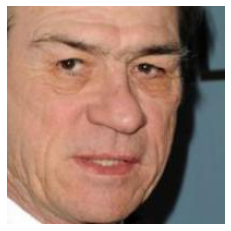

In [ ]:
from PIL import Image
img = Image.open(image[190])
plt.axis('off')
plt.imshow(img)

width, height = img.size
#print("height:", height)
#print("width:", width)
print("age: ",df['age'][190])
print("age_target: ",df['age_target'][190])
print("gender: ",df['gender'][190])

In [ ]:
image.shape

(10497,)

In [ ]:
X_train, X_test, y_age_train, y_age_test, y_gender_train, y_gender_test = train_test_split(X, label_age, label_gender, test_size=0.2)

In [ ]:
print(y_gender_train)
print(y_age_train)

[0 0 0 ... 0 1 1]
[5 4 0 ... 5 4 4]


In [ ]:
y_age_train = np.array(y_age_train)
y_gender_train = np.array(y_gender_train)
y_age_test = np.array(y_age_test)
y_gender_test = np.array(y_gender_test)

print(y_age_train.shape)
print(y_gender_train.shape)
print(y_age_test.shape)
print(y_gender_test.shape)

print(type(y_age_train))
print(type(y_gender_train))
print(type(y_age_test))
print(type(y_gender_test))

(8397,)
(8397,)
(2100,)
(2100,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
''' X_train, X_test, y_age_train, y_age_test, y_gender_train, y_gender_test '''
X_train_tensor = torch.from_numpy(X_train)
print("X_train tensor : ", X_train_tensor.size())

X_test_tensor = torch.from_numpy(X_test)
print("X_test tensor : ", X_test_tensor.size())

y_age_train_tensor = torch.from_numpy(y_age_train)
print("y_age_train tensor : ", y_age_train_tensor.size())

y_gender_train_tensor = torch.from_numpy(y_gender_train)
print("y_gender_train tensor : ", y_gender_train_tensor.size())

y_age_test_tensor = torch.from_numpy(y_age_test)
print("y_age_test tensor : ", y_age_test_tensor.size())

y_gender_test_tensor = torch.from_numpy(y_gender_test)
print("y_gender_test tensor : ", y_gender_test_tensor.size())

X_train tensor :  torch.Size([8397, 1, 128, 128])
X_test tensor :  torch.Size([2100, 1, 128, 128])
y_age_train tensor :  torch.Size([8397])
y_gender_train tensor :  torch.Size([8397])
y_age_test tensor :  torch.Size([2100])
y_gender_test tensor :  torch.Size([2100])


In [ ]:
train = torch.utils.data.TensorDataset(X_train_tensor, y_age_train_tensor, y_gender_train_tensor)

test = torch.utils.data.TensorDataset(X_test_tensor, y_age_test_tensor, y_gender_test_tensor)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train, batch_size = 50, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test, batch_size = 50, shuffle=True, num_workers=4)

In [ ]:
# Building Model

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, padding=1, stride=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size = 2)


        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding=1, stride=1)

        self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding=1, stride=1)

        self.conv4 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, padding=1, stride=1)

        #nn.Flatten()

        self.fc1 = nn.Linear(in_features = 256*8*8, out_features = 8192)

        self.fc2 = nn.Linear(in_features = 8192, out_features = 512)

        self.linear1 = nn.Linear(in_features = 512, out_features = 13) # For age class output
        self.linear2 = nn.Linear(in_features = 512, out_features = 2)   # For gender class output

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.maxpool(out)

        out = self.conv2(out)
        out = self.relu(out)
        out = self.maxpool(out)

        out = self.conv3(out)
        out = self.relu(out)
        out = self.maxpool(out)

        out = self.conv4(out)
        out = self.relu(out)
        out = self.maxpool(out)

        #print(out.shape)
        out = out.view(x.size(0),-1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        label1 = self.linear1(out)                 # Age output
        label2 = self.linear2(out) # Gender output

        return {'label1': torch.softmax(label1,dim=1), 'label2': label2}

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
#net = Net(True).to(device)
net = Net()
#from torchsummary import summary
#net.summary()
#summary(net, (1, 128, 128))
# if torch.cuda.is_available():
#   net.cuda()
net

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=16384, out_features=8192, bias=True)
  (fc2): Linear(in_features=8192, out_features=512, bias=True)
  (linear1): Linear(in_features=512, out_features=13, bias=True)
  (linear2): Linear(in_features=512, out_features=2, bias=True)
)

In [ ]:
training_loss_list = []
iter_list=[]

def train(net, device, criterion1, criterion2, train_dataloader, optimizer, epoch):
  # Set the model to training mode
  net.train()
  train_loss = 0
  print("Epoch:", epoch)

  # Process the images in batches
  for batch_idx, (data, target1, target2) in enumerate(train_dataloader):
    data, target1, target2 = data.to(device), target1.to(device), target2.to(device)

    # label1_new = torch.zeros((target1.shape[0], 116))
    # label2_new = torch.zeros((target2.shape[0], 2))
    # for t in range(label1_new.shape[0]):
    #   label1_new[t,target1[t].data-1] = 1.0
    # for t in range(label2_new.shape[0]):
    #   label2_new[t,target2[t].data-1] = 1.0

    # Reset the optimizer
    optimizer.zero_grad()

    #Push the data forward through the model layer
    output = net(data.float())

    label1_hat = output['label1']
    label2_hat = output['label2']

    # Get the loss
    loss1 = criterion1(label1_hat, target1)
    loss2 = criterion2(label2_hat, target2)
    loss = loss1 + loss2

    # Backpropagate
    loss.backward()
    optimizer.step()

    train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
    if batch_idx % 50 == 0:
      print('Epoch %d, Batch %d loss: %.6f' % (epoch, batch_idx + 1, train_loss))

  # return average loss for the epoch
  #avg_loss = train_loss / (batch_idx + 1)
  iter_list.append(epoch)
  training_loss_list.append(train_loss)
  print('Training set: Average loss: {:.6f}'.format(train_loss))
  return train_loss

In [ ]:
age_accuracy_list = []
gender_accuracy_list = []
validation_loss_list=[]

def test(net, device, criterion1, criterion2, test_dataloader, optimizer, epoch):

  # Switch the model to evaluation mode
  net.eval()
  correct_1 = 0
  correct_2 = 0
  total_1 = 0
  total_2 = 0
  valid_loss = 0

  with torch.no_grad():

    for batch_idx, (data, target1, target2) in enumerate(test_dataloader):
      data, target1, target2 = data.to(device), target1.to(device), target2.to(device)

      # label1_new = torch.zeros((target1.shape[0], 116))
      # label2_new = torch.zeros((target2.shape[0], 2))
      # for t in range(label1_new.shape[0]):
      #   label1_new[t,target1[t].data-1] = 1.0
      # for t in range(label2_new.shape[0]):
      #   label2_new[t,target2[t].data-1] = 1.0

      data = data.requires_grad_()  # Load images(for accuracy)
      output = net(data.float())

      _, predicted1 = torch.max(output['label1'], 1)
      _, predicted2 = torch.max(output['label2'], 1)

      label1_hat = output['label1']
      label2_hat = output['label2']

      total_1 += target1.size(0)
      total_2 += target2.size(0)

      correct_1 += torch.sum(predicted1 == target1).item()
      correct_2 += torch.sum(predicted2 == target2).item()

      age_accuracy = 100 * correct_1 // total_1
      gender_accuracy = 100 * correct_2 // total_2

      # calculate loss
      loss1 = criterion1(label1_hat, target1)
      loss2 = criterion2(label2_hat, target2)
      loss = loss1+loss2
      valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tAge_Accuracy: {} \tGender_Accuracy: {}'.format(
            epoch, train_loss, valid_loss, age_accuracy, gender_accuracy))
    age_accuracy_list.append(age_accuracy)
    gender_accuracy_list.append(gender_accuracy)
    validation_loss_list.append(valid_loss)
    return valid_loss, age_accuracy, gender_accuracy

In [ ]:
import torch.optim as optim

# For multilabel output:Age
criterion_multioutput = nn.CrossEntropyLoss()

# For binary output:Gender
criterion_binary = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters(), lr=0.001)

epochs = 20
print('Training on', device)

for epoch in range(1, epochs + 1):
  train_loss = train(net, device, criterion_multioutput, criterion_binary, train_dataloader, optimizer, epoch)
  valid_loss = test(net, device, criterion_multioutput, criterion_binary, test_dataloader, optimizer, epoch)

Training on cpu
Epoch: 1
Epoch 1, Batch 1 loss: 3.254660
Epoch 1, Batch 51 loss: 3.149797
Epoch 1, Batch 101 loss: 3.092356
Epoch 1, Batch 151 loss: 3.048295
Training set: Average loss: 3.033094
Epoch: 1 	Training Loss: 3.033094 	Validation Loss: 2.828382 	Age_Accuracy: 40 	Gender_Accuracy: 73
Epoch: 2
Epoch 2, Batch 1 loss: 2.705379
Epoch 2, Batch 51 loss: 2.828259
Epoch 2, Batch 101 loss: 2.791880
Epoch 2, Batch 151 loss: 2.775067
Training set: Average loss: 2.775139
Epoch: 2 	Training Loss: 2.775139 	Validation Loss: 2.742459 	Age_Accuracy: 41 	Gender_Accuracy: 77
Epoch: 3
Epoch 3, Batch 1 loss: 2.696691
Epoch 3, Batch 51 loss: 2.668281
Epoch 3, Batch 101 loss: 2.667477
Epoch 3, Batch 151 loss: 2.648415
Training set: Average loss: 2.645284
Epoch: 3 	Training Loss: 2.645284 	Validation Loss: 2.576792 	Age_Accuracy: 44 	Gender_Accuracy: 84
Epoch: 4
Epoch 4, Batch 1 loss: 2.609767
Epoch 4, Batch 51 loss: 2.582129
Epoch 4, Batch 101 loss: 2.590249
Epoch 4, Batch 151 loss: 2.593665
Train

<Figure size 432x288 with 0 Axes>

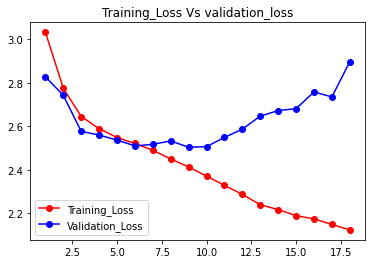

<Figure size 432x288 with 0 Axes>

In [ ]:
## Training_Loss Vs validation_loss

%matplotlib inline
import matplotlib.pyplot as plt

validation_loss_list = [2.828382, 2.742459,2.576792,2.560116,2.536669,2.51011,2.517106,2.533155,2.503656,2.506757,2.549022,2.586974,2.647179,2.672633,2.681335,2.758361,2.735427,2.897316]
training_loss_list = [3.033094,2.775139,2.645284,2.589535,2.548387,2.52126,2.489824, 2.449896,2.413096,2.370816,2.328642,2.286702,2.239295,2.216944,2.189154,2.174181,2.148645,2.123414]
iteration = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

plt.plot(iteration, training_loss_list, 'r', label='Training_Loss', marker = "o")
plt.plot(iteration, validation_loss_list, 'b', label='Validation_Loss', marker = "o")
plt.title('Training_Loss Vs validation_loss')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

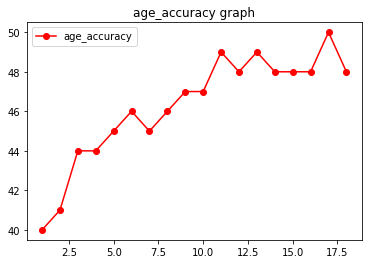

<Figure size 432x288 with 0 Axes>

In [ ]:
## age_accuracy graph

%matplotlib inline
age_accuracy = [40,41,44,44,45,46,45,46,47,47,49,48,49,48,48,48,50,48]
iteration = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

plt.plot(iteration, age_accuracy, 'r', label='age_accuracy', marker = "o")
plt.title('age_accuracy graph')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

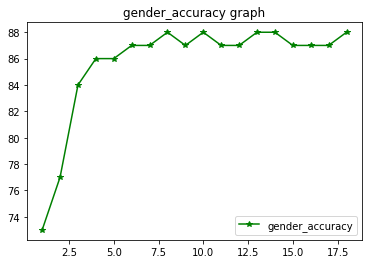

<Figure size 432x288 with 0 Axes>

In [ ]:
## gender_accuracy graph

%matplotlib inline
gender_accuracy = [73,77,84,86,86,87,87,88,87,88,87,87,88,88,87,87,87,88]
iteration = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

plt.plot(iteration, gender_accuracy, 'g', label='gender_accuracy', marker = "*")
plt.title('gender_accuracy graph')
plt.legend()
plt.figure()

In [ ]:
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 4.2 MB/s eta 0:00:00


In [ ]:
import xlsxwriter


#wb = Workbook()
test_filename = 'test_workbook.xlsx'

workbook = xlsxwriter.Workbook('/content/drive//MyDrive/Age N Gender Prediction_11_2_23.xlsx')
#wb.save('/content/drive/MyDrive/+test_filename')

worksheet = workbook.add_worksheet("9_2_23_v2")

worksheet.write('A1','Epochs')
row = 1
column = 0
for item in iter_list:
    worksheet.write(row, column, item)
    row += 1

worksheet.write('B1','Training Loss')
row = 1
column = 1
for item in training_loss_list:
    worksheet.write(row, column, item)
    row += 1

worksheet.write('C1','Validation Loss')
row = 1
column = 2
for item in validation_loss_list:
    worksheet.write(row, column, item)
    row += 1

worksheet.write('D1','Age Accuracy')
row = 1
column = 3
for item in age_accuracy_list:
    worksheet.write(row, column, item)
    row += 1

worksheet.write('E1','Gender Accuracy')
row = 1
column = 4
for item in gender_accuracy_list:
    worksheet.write(row, column, item)
    row += 1

workbook.close()